In [2]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Soil/Crop_recommendation.csv')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
data.shape

(2200, 8)

In [7]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.451753,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.749662,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.420238,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.904050,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [14]:
data['label'].unique()

array(['rice', 'maize', 'Carrots', 'Bean', 'pigeonpeas', 'Cowpea',
       'mungbean', 'Onion', 'Chilli', 'pomegranate', 'banana', 'mango',
       'grapes', 'watermelon', 'cashew nuts', 'Potato', 'orange',
       'papaya', 'coconut', 'Pumpkin', 'Ground Nut', 'coffee'],
      dtype=object)

In [15]:
data['label'].value_counts()

rice           100
maize          100
Ground Nut     100
Pumpkin        100
coconut        100
papaya         100
orange         100
Potato         100
cashew nuts    100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
Chilli         100
Onion          100
mungbean       100
Cowpea         100
pigeonpeas     100
Bean           100
Carrots        100
coffee         100
Name: label, dtype: int64

In [16]:
crop_summary=pd.pivot_table(data, index=['label'], aggfunc='mean')

In [17]:
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
Bean,20.05,20.75,67.54,21.605357,5.749411,105.919778,20.115085
Carrots,79.92,40.09,67.79,16.860439,6.946957,80.058977,18.872847
Chilli,19.41,18.77,68.36,64.804785,6.927932,45.680454,24.509052
Cowpea,20.23,21.44,48.01,53.160418,6.831174,51.198487,28.194920
Ground Nut,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376
Onion,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
Potato,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
Pumpkin,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798


In [18]:
import plotly.express as px

<Axes: >

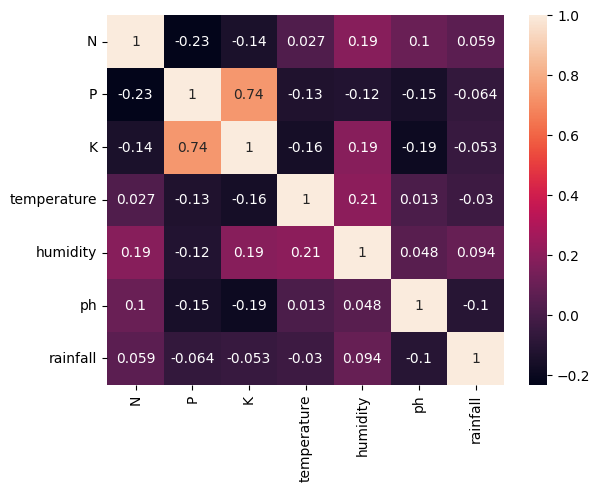

In [19]:
sns.heatmap(data.corr(),annot=True)

#Separating features and target label

In [20]:
features =data[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = data['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = data['label']

In [21]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [22]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Train Dataset

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Guassian Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

        Bean       1.00      1.00      1.00        14
     Carrots       1.00      1.00      1.00        21
      Chilli       1.00      1.00      1.00        23
      Cowpea       1.00      1.00      1.00        19
  Ground Nut       0.88      1.00      0.93        28
       Onion       1.00      1.00      1.00        16
      Potato       1.00      1.00      1.00        13
     Pumpkin       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        17
 cashew nuts       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        18
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
    mungbean       1.00      1.00      1.00        24
      orange       1.00      1.00  

In [25]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [26]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

        Bean       1.00      1.00      1.00        14
     Carrots       1.00      1.00      1.00        21
      Chilli       1.00      1.00      1.00        23
      Cowpea       1.00      0.95      0.97        19
  Ground Nut       0.90      1.00      0.95        28
       Onion       0.94      1.00      0.97        16
      Potato       1.00      1.00      1.00        13
     Pumpkin       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        17
 cashew nuts       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        18
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
    mungbean       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00 

In [28]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

### Saving trained Random Forest model

In [29]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

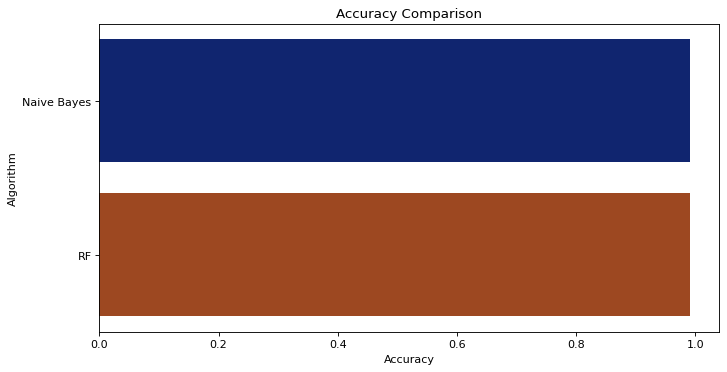

In [30]:
plt.figure(figsize=[10,5],dpi = 80)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [31]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Naive Bayes --> 0.990909090909091
RF --> 0.990909090909091


## Making a prediction

In [32]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [33]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = NaiveBayes.predict(data)
print(prediction)

['Ground Nut']
